# A. Import Necessary Libraries and Files

In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA

In [ ]:
test_id = pd.read_csv('test_identity.csv')
test_trans = pd.read_csv('test_transaction.csv')
train_id = pd.read_csv('train_identity.csv')
train_trans = pd.read_csv('train_transaction.csv')

# B. Data Cleaning

## 1. Merge Files

In [ ]:
train = pd.merge(train_trans, train_id, on='TransactionID', how='left')

test = pd.merge(test_trans, test_id, on='TransactionID', how='left')

## 2. Handle Missing Values

### a. Inspecting the data

In [ ]:
def cutnabythreshold(df, threshold):
    return df.loc[:, df.isnull().mean() < threshold]

def show_na(df):
    nan_counts = df.isna().sum()*100/len(df)
    nan_counts = nan_counts[nan_counts > 0]

    plt.figure(figsize=(6, 4))
    plt.hist(nan_counts, bins=30, edgecolor='black')
    plt.title("Distribution of Missing Value Counts Across Features")
    plt.xlabel("Number of Missing Values")
    plt.ylabel("Number of Features")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

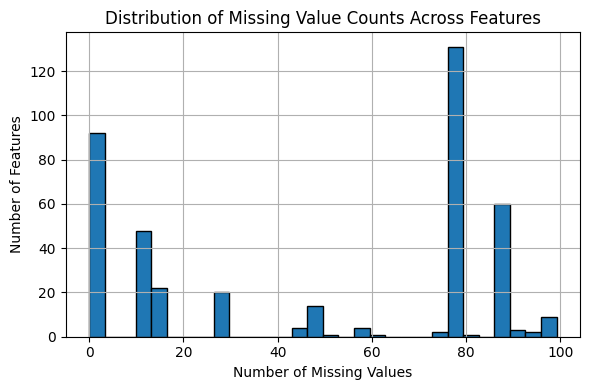

In [20]:
show_na(train)

In [ ]:
train_cut = cutnabythreshold(train, 0.8)

### b. Handling Missing Values by Value Types and Column Groups

## Categorical Groups

#### b1. Id Columns (Id_01 - Id_38) Processing

In [ ]:
train_id_try = cutnabythreshold(train_id, 0.8)

train_trans_try = cutnabythreshold(train_trans, 0.8)

### id_30 shows OS and version

train_id_try[['OS', 'OS_Version']] = train_id_try['id_30'].str.extract(r'(\w+)\s*([0-9._]+)?')

train_id_try['OS_Version'] = train_id_try['OS_Version'].str.split('.').str[0].astype(float)

### id_33 shows resolution scales
train_id_try[['ScreenWidth', 'ScreenHeight']] = train_id_try['id_33'].str.split('x', expand=True).astype(float)
train_id_try['AspectRatio'] = train_id_try['ScreenWidth'] / train_id_try['ScreenHeight']

### id34 shows match_status
train_id_try['MatchStatus'] = train_id_try['id_34'].str.extract(r'(\d+)').astype(float)

train_id_try = train_id_try.drop(['id_30', 'id_31', 'id_33', 'id_34', 'ScreenWidth', 'ScreenHeight', 'DeviceInfo'], axis = 1)

In [8]:
train_cut = cutnabythreshold(train, 0.8)
train_cut['P_emaildomain'] = train_cut['P_emaildomain'].str.split('.').str[0]

C:\Users\admin\AppData\Local\Temp\ipykernel_12488\3453310408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cut['P_emaildomain'] = train_cut['P_emaildomain'].str.split('.').str[0]


In [9]:
train_cut = train_cut.drop(['id_31', 'id_29'], axis = 1)

In [17]:
train_cut

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_17,id_19,id_20,id_28,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,166.0,542.0,144.0,New,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


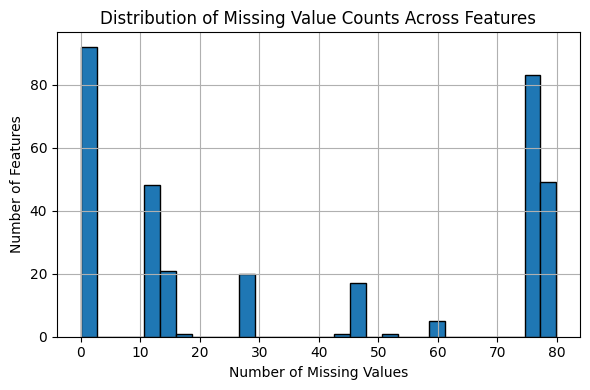

In [18]:
show_na(train_cut)

### Imputing Method

In [160]:
df = train_cut

In [ ]:
scaler = StandardScaler()
knn_imputer = KNNImputer(n_neighbors=5)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
df = df.drop(['R_emaildomain', 'TransactionID', 'DeviceInfo'], axis = 1)

df['P_emaildomain'] = df['P_emaildomain'].str.split('.').str[0]


In [48]:
null = df[df.isnull().any(axis = 1)]
null

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_17,id_19,id_20,id_28,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,166.0,542.0,144.0,New,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cat_cols_to_fill = [
    'id_12', 'id_15', 'id_16', 'id_28', 'id_35',
    'id_36', 'id_37', 'id_38', 'DeviceType'
]

df[cat_cols_to_fill] = df[cat_cols_to_fill].fillna('missing')

# As there are columns wiht Unknown and NotFound
for col in cat_cols_to_fill:
    df[col] = df[col].replace(['Unknown', 'NotFound'], 'missing')

In [90]:
for col in cat_cols_to_fill:
    print(df[col].value_counts())

id_12
missing    569332
Found       21208
Name: count, dtype: int64
id_15
missing    461200
Found       67728
New         61612
Name: count, dtype: int64
id_16
missing    524216
Found       66324
Name: count, dtype: int64
id_28
missing    449562
Found       76232
New         64746
Name: count, dtype: int64
id_35
missing    449555
T           77814
F           63171
Name: count, dtype: int64
id_36
missing    449555
F          134066
T            6919
Name: count, dtype: int64
id_37
missing    449555
T          110452
F           30533
Name: count, dtype: int64
id_38
missing    449555
F           73922
T           67063
Name: count, dtype: int64
DeviceType
missing    449730
desktop     85165
mobile      55645
Name: count, dtype: int64


In [15]:
keywords = ['Found', 'New']
source_cols = ['id_12', 'id_15', 'id_16', 'id_28']
binary_cols = ['id_35', 'id_36', 'id_37', 'id_38']
device_col = 'DeviceType'

with open('column_keyword_analysis.txt', 'w') as f:
    for target_col in source_cols:
        for keyword in keywords:
            # Filter rows where target_col contains keyword
            filtered_df = df[df[target_col].str.contains(keyword, na=False, case=False)]
            total = len(filtered_df)

            f.write(f'\n=== Rows where {target_col} contains "{keyword}" ===\n')
            f.write(f'Total matching rows: {total}\n\n')

            # Count 'T' in each binary column
            for col in binary_cols:
                t_count = filtered_df[col].value_counts().get('T', 0)
                percentage = (t_count / total * 100) if total > 0 else 0
                f.write(f'{col} = "T": {t_count} out of {total} ({percentage:.2f}%)\n')

            # Count non-null DeviceType
            non_null_device = filtered_df[device_col].notna().sum()
            percentage_device = (non_null_device / total * 100) if total > 0 else 0
            f.write(f'{device_col} (non-null): {non_null_device} out of {total} ({percentage_device:.2f}%)\n')

In [16]:
check_values = ['T', 'Found', 'New']
cols_to_check = ['id_12', 'id_15', 'id_16', 'id_28', 'id_35',
    'id_36', 'id_37', 'id_38']

df['VerificationSet'] = df[cols_to_check].apply(
    lambda row: sum(
        any(str(val).lower() == cv.lower() or cv.lower() in str(val).lower()
            for cv in check_values)
        for val in row
    ),
    axis=1
)

df = df.drop(cols_to_check, axis = 1)

In [102]:
df.tail(2)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,DeviceType,VerificationSet
590538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,aol,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,22.0,22.0,22.0,T,T,T,M0,F,T,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,117.000000,1035.500000,117.000000,117.0,117.0,117.0,0.0,918.5,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,2.0,7.0,1.0,5.0,0.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,117.000000,2903.500000,117.000000,117.0,669.5,0.0,117.0,317.5,669.5,317.5,0.0,2234.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,0
590539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,credit,299.0,87.0,NaN,gmail,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,T,F,F,NaN,NaN,T,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,279.950012,279.950012,279.950012,0.0,0.0,0.0,0.0,0.0,0.0,279.950012,279.950012,279.950012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### b2. M Column Processing

In [17]:
cat_col = df.select_dtypes(include = 'object').columns

df[cat_col].isna().sum()

ProductCD             0
card4              1577
card6              1571
P_emaildomain     94456
M1               271100
M2               271100
M3               271100
M4               281444
M5               350482
M6               169360
M7               346265
M8               346252
M9               346252
DeviceType            0
dtype: int64

In [20]:
m_columns = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

for col in m_columns:
    print(f"\nValue counts for {col}:")
    print(df[col].nunique())



Value counts for M1:
2

Value counts for M2:
2

Value counts for M3:
2

Value counts for M4:
2

Value counts for M5:
2

Value counts for M6:
2

Value counts for M7:
2

Value counts for M8:
2

Value counts for M9:
2


In [120]:
df['M4'].value_counts()

ERROR! Session/line number was not unique in database. History logging moved to new session 817


M4
M0    196405
M2     59865
M1     52826
Name: count, dtype: int64

In [18]:
df['M4'] = df['M4'].apply(lambda x: 'F' if x == 'M0' else 'T')

In [22]:
df.head(2)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,DeviceType,VerificationSet
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,0
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,0


In [24]:
for col in m_columns:
    df[col] = df[col].fillna('F')
    
key = 'T'

df['MatchingCount'] = df[m_columns].apply(
    lambda row: sum(str(val).lower() == key.lower() for val in row),
    axis=1
)


df = df.drop(m_columns, axis = 1)

### b3. Others
- As P_email_domain contains so many different label, we will separate into top 5 most popular and the left + NaN are others 
- For card4 and card6 just use SimpleImputer

In [26]:
cat_col = df.select_dtypes(include = 'object').columns

df[cat_col].isna().sum()

ProductCD            0
card4             1577
card6             1571
P_emaildomain    94456
DeviceType           0
dtype: int64

In [141]:
df['P_emaildomain'].value_counts()

P_emaildomain
gmail           228851
yahoo           102909
hotmail          46005
anonymous        36998
aol              28289
comcast           7888
icloud            6267
outlook           5534
msn               4092
att               4033
live              3846
sbcglobal         2970
verizon           2705
ymail             2396
bellsouth         1909
me                1522
cox               1393
optonline         1011
charter            816
rocketmail         664
mail               559
earthlink          514
mac                436
netzero            426
juno               322
aim                315
roadrunner         305
windstream         305
frontier           280
embarqmail         260
web                240
twc                230
prodigy            207
centurylink        205
frontiernet        195
q                  189
suddenlink         175
cfl                172
sc                 164
cableone           159
gmx                149
protonmail          76
ptd                 

In [27]:
df['P_emaildomain'] = df['P_emaildomain'].apply(lambda x: x if x == 'gmail' or x == 'yahoo' else 'others')

df['card4'] = cat_imputer.fit_transform(df[['card4']]).ravel()

df['card6'] = cat_imputer.fit_transform(df[['card6']]).ravel()

In [28]:
df[cat_col].isna().sum()

ProductCD        0
card4            0
card6            0
P_emaildomain    0
DeviceType       0
dtype: int64

In [148]:
df.head(2)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_13,id_17,id_19,id_20,DeviceType,VerificationSet,MatchingCount
0,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,others,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missing,0,5
1,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Numerical Groups

#### b4. Card Columns Preprocessing

In [150]:
card = ['card1', 'card2', 'card3', 'card5']

df[card].isna().sum()*100/len(df)

card1    0.000000
card2    1.512683
card3    0.265012
card5    0.721204
dtype: float64

In [29]:
df['card2'] = num_imputer.fit_transform(df[['card2']]).ravel()
df['card3'] = num_imputer.fit_transform(df[['card3']]).ravel()
df['card5'] = num_imputer.fit_transform(df[['card5']]).ravel()

In [46]:
df['card3'].value_counts()

card3
150.0    522852
185.0     56346
106.0      1571
144.0      1252
146.0      1252
          ...  
224.0         1
199.0         1
221.0         1
209.0         1
173.0         1
Name: count, Length: 114, dtype: int64

In [50]:
df['card3'] = df['card3'].apply(lambda x: x if x == 150.0 or x == 185.0 else 'other')

#### b5. Address Column Preprocessing

In [35]:
df['addr2'].value_counts()

addr2
87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
49.0         1
14.0         1
25.0         1
22.0         1
93.0         1
Name: count, Length: 74, dtype: int64

In [171]:
df['addr2'] = df['addr2'].apply(lambda x: x if x == 87.0 or x == 60.0 else 'other')

<Axes: ylabel='Count'>

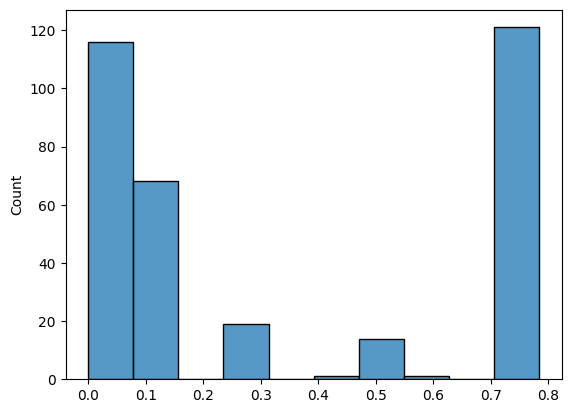

In [56]:
sns.histplot(df.isna().sum()/len(df))

In [59]:
num_col = df.select_dtypes(exclude = 'object').columns

#### b6. V Column Preprocessing

In [62]:
# Store matching columns in lists
columns_with_03_and_nan = []
columns_with_04_06_and_nan = []

for col in df.columns:
    if df[col].dtype != 'float':  # optional: only look at float columns
        continue
    # Condition: column has at least one value around 0.3 (e.g. 0.25–0.35) and also has NaNs
    if df[col].between(0.25, 0.35).any() and df[col].isna().any():
        columns_with_03_and_nan.append(col)

    # Condition: column has values between 0.4 and 0.6 and also has NaNs
    if df[col].between(0.4, 0.6).any() and df[col].isna().any():
        columns_with_04_06_and_nan.append(col)

print("Columns with values around 0.3 and some NaNs:")
print(columns_with_03_and_nan)

print("\nColumns with values between 0.4 and 0.6 and some NaNs:")
print(columns_with_04_06_and_nan)


Columns with values around 0.3 and some NaNs:
['V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318']

Columns with values between 0.4 and 0.6 and some NaNs:
['V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V202', 'V203', 'V204', 'V211', 'V212', 'V213', 'V263', 'V264', 'V265', 'V267', 'V268', 'V271', 'V272', 'V273', 'V275', 'V306', 'V307', 'V308', 'V310', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318']


In [93]:
columns_with_lt_02_and_nan = []
columns_with_gt_07_and_nan = []

for col in df.columns:
    if df[col].dtype != 'float':  # optional: only check float columns
        continue
    # Condition: has values < 0.2 and has NaNs
    if ((df[col] < 0.2) & (df[col]>0)).any() and df[col].isna().any():
        columns_with_lt_02_and_nan.append(col)
    
    # Condition: has values > 0.7 and has NaNs
    if (df[col] > 0.7).any() and df[col].isna().any():
        columns_with_gt_07_and_nan.append(col)

print("Columns with values < 0.2 and also have NaNs:")
print(columns_with_lt_02_and_nan)
print(len(columns_with_lt_02_and_nan))

print("\nColumns with values > 0.7 and also have NaNs:")
print(columns_with_gt_07_and_nan)
print(len(columns_with_gt_07_and_nan))

Columns with values < 0.2 and also have NaNs:
['V265', 'V268']
2

Columns with values > 0.7 and also have NaNs:
['addr1', 'dist1', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 

#### Observation: We can see that all of the middle part (0.3 & 0.5) and most of the other ranges are V columns

V-columns are Engineered anonymized features. Often contain predictive signals. So we cannot use any way to logically impute them, we have to deal with tradeoff when imputing this with proper ways

In [164]:
# Dynamically select existing V columns from the DataFrame
V_cols = [col for col in df.columns if col.startswith('V') and col[1:].isdigit()]

low_nulls = [col for col in V_cols if df[col].isna().mean() < 0.2]
medium_nulls = [col for col in V_cols if 0.2 <= df[col].isna().mean() <= 0.7]
high_nulls = [col for col in V_cols if df[col].isna().mean() > 0.7]

print(f'Low Null: {len(low_nulls)}')
print(f'Mid Null: {len(medium_nulls)}')
print(f'High Null: {len(high_nulls)}')

Low Null: 180
Mid Null: 0
High Null: 0


### We will use 

* Median for low null
* KNN for mid null
* Drop High Null

In [165]:
df[low_nulls] = num_imputer.fit_transform(df[low_nulls])

In [ ]:
from sklearn.impute import KNNImputer
from tqdm import tqdm

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Split medium_nulls into chunks of 5
chunk_size = 5
col_chunks = [medium_nulls[i:i + chunk_size] for i in range(0, len(medium_nulls), chunk_size)]

# Impute each chunk separately
for cols in tqdm(col_chunks, desc="KNN imputing column batches"):
    df[cols] = knn_imputer.fit_transform(df[cols])


In [ ]:
df = df.drop(high_nulls, axis = 1)

In [12]:
df.shape

(590540, 228)

### Deal with other columns

In [70]:
# Store matching columns in lists
columns_null = []

for col in df.columns:
    if df[col].dtype != 'float':  # optional: only look at float columns
        continue
    # Condition: column has at least one value around 0.3 (e.g. 0.25–0.35) and also has NaNs
    if  df[col].isna().any():
        columns_null.append(col)



print("\nOther NaN column")
print(columns_null)



Other NaN column
['D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']


#### addr1: Billing Region

In [28]:
df['addr1'].value_counts()

addr1
299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
386.0        1
101.0        1
353.0        1
516.0        1
245.0        1
Name: count, Length: 332, dtype: int64

In [27]:
df['addr2'].value_counts()

addr2
87.0     520481
other     66975
60.0       3084
Name: count, dtype: int64

<Axes: xlabel='addr1', ylabel='Count'>

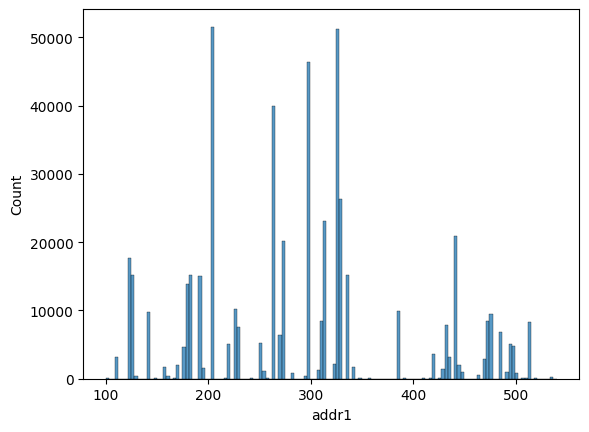

In [35]:
sns.histplot(df['addr1'])

In [36]:
value_counts = df['addr1'].value_counts()

# Filter labels with counts less than 10
rare_labels = value_counts[value_counts > 20000]

len(rare_labels)

8

Pick top 8 most popular billing region. The rest will be given to Others

In [170]:
common_labels = df['addr1'].value_counts()
common_labels = common_labels[common_labels > 20000].index

df['addr1'] = df['addr1'].apply(lambda x: x if x in common_labels else 'others')

#### Distance1


<Axes: ylabel='Count'>

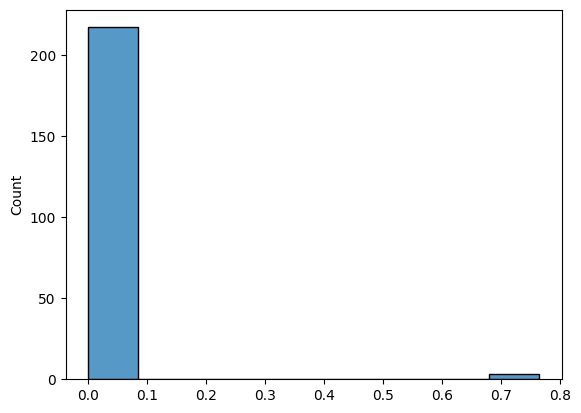

In [118]:
sns.histplot(df.isna().mean())

In [174]:
# Fillna in 'dist1' using group mean by addr1 and addr2
df['dist1'] = df['dist1'].fillna(
    df.groupby(['addr1', 'addr2'])['dist1'].transform('mean')
)

In [67]:
df['dist1'].isna().sum()

3099

 Drop other rows that cannot be imputed

In [68]:
df = df.dropna(subset = ['dist1'])

In [ ]:
num_id = ['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']

df['id_01'].value_counts()

#### Deal with D- columns (time deltas)

In [72]:
delta = ['D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15']

df[delta].isna().mean()

D1     0.002135
D2     0.474129
D3     0.444118
D4     0.287348
D5     0.524619
D10    0.129378
D11    0.470171
D15    0.151522
dtype: float64

D1 to D15 — Interpreted Descriptions

Column	Interpretation
* D1	Days since last login (or first observed activity)
* D2	Days since card was issued or account was created
* D3	Days since last known address update
* D4	Days since last transaction with same card/account
* D5	Days since last transaction using the same email or browser
* D10	Days since first transaction on current session
* D11	Days since device was first associated with the account
* D15	Days since last online interaction with the current device

In [ ]:
## D1 can be imputed by Median
df['D1'] = df['D1'].fillna(df['D1'].median())

#D2 relies on card1 - user identifier
df['D2'] = df['D2'].fillna(df.groupby('card1')['D2'].transform('median'))
df['D2'] = df['D2'].fillna(df['D2'].median())

#D3 relies on addresses 
df['D3'] = df['D3'].fillna(df.groupby(['addr1', 'addr2'])['D3'].transform('median'))

#D4 relies on card 1
df['D4'] = df['D4'].fillna(df.groupby('card1')['D4'].transform('median'))
df['D4'] = df['D4'].fillna(df['D4'].median())

#D5 relies on users' email
df['D5'] = df['D5'].fillna(df.groupby('P_emaildomain')['D5'].transform('median'))

#D10 relies on card 1 
df['D10'] = df['D10'].fillna(df.groupby('card1')['D10'].transform('median'))
df['D10'] = df['D10'].fillna(df['D10'].median())

#D11 can be dropped as there's no relevant information to track and half are null
df = df.drop(['D11'], axis = 1)

#D15 relies on Device, but Device has 3 labels, so D15 should be dropped 
df = df.drop(['D15'], axis = 1)

In [96]:
# Store matching columns in lists
columns_null = []

for col in df.columns:
    if df[col].dtype != 'float':  # optional: only look at float columns
        continue
    # Condition: column has at least one value around 0.3 (e.g. 0.25–0.35) and also has NaNs
    if  df[col].isna().any():
        columns_null.append(col)



print("\nOther NaN column")
print(columns_null)



Other NaN column
['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']


id_XX Columns — Interpretations
Column	Likely Meaning
* id_01	Time delta: minutes between current transaction and account creation
* id_02	Time delta: seconds since last login or transaction
* id_05	User age (in years) — may be bucketed or capped
* id_06	Indicates if user has registered the account with a phone number
* id_11	Device Match score
* id_13	Time zone difference (user local time vs server) in hours
* id_17	Days since last login or activity
* id_19	Browser width or screen resolution width
* id_20	Browser height or screen resolution height

In [166]:
# As the column distribution don't correlate with the meaning and the proportion of Null is too high I'll just drop all of them

df = df.drop(['id_19', 'id_20', 'id_31', 'id_11'], axis = 1)

df = df.drop(id, axis = 1)

## 3. PCA

In [138]:
V_cols = [col for col in df.columns if col.startswith('V') and col[1:].isdigit()]

pca = PCA()
df_V = df[V_cols]

In [139]:
df_V

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


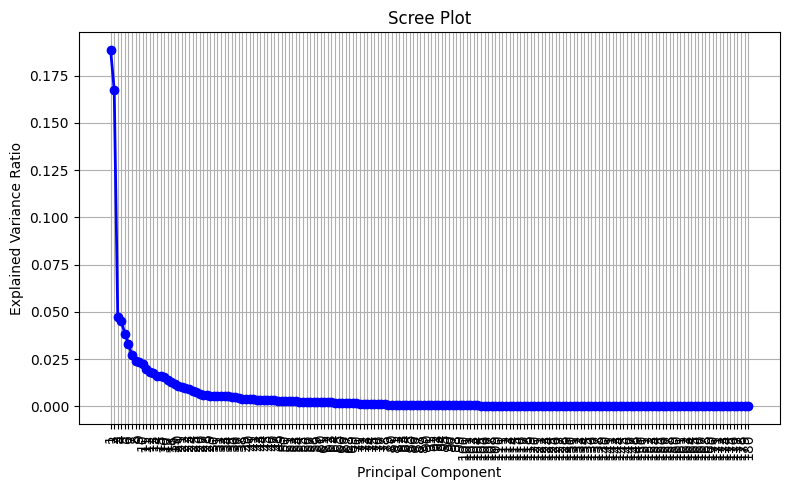

In [141]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_V)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)

# Plot Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(components, explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components, rotation = 90)
plt.grid(True)
plt.tight_layout()
plt.show()

Elbow at PC: 14


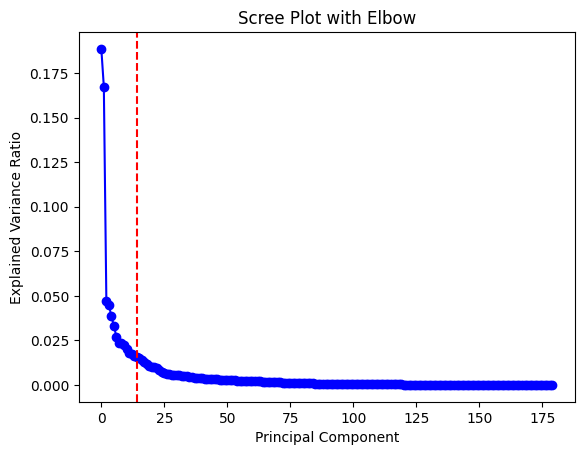

In [144]:
from kneed import KneeLocator


# Assuming you have your PCA fitted already:
pca = PCA()
pca.fit(scaled_data)  # data is your dataset

explained_variance = pca.explained_variance_ratio_

# Detect the elbow
knee = KneeLocator(
    range(1, len(explained_variance)+1), explained_variance, curve='convex', direction='decreasing'
)

print("Elbow at PC:", knee.knee)

# Optional: Plot
plt.plot(explained_variance, 'bo-')
plt.axvline(x=knee.knee, color='r', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot with Elbow')
plt.show()


In [ ]:
#PCA to 14, drop all Vs and join back

pc14 = PCA(n_components=14)

pc_df = pd.DataFrame(pc14.fit_transform(scaled_data))

df_noV = df.drop(V_cols, axis = 1)

df_noV = df_noV.reset_index(drop=True)
pc_df = pc_df.reset_index(drop=True)

df = pd.concat([df_noV, pc_df], axis=1)

In [201]:
df

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,4,5,6,7,8,9,10,11,12,13
0,0,86400,68.50,W,13926,361.0,150.0,discover,142.0,credit,...,-1.653196,-0.139864,-0.731344,0.299316,-0.028130,-0.277146,0.920667,0.358542,-0.296964,0.380415
1,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,-1.486360,-0.065914,1.490355,-1.655177,-0.215142,1.449773,-2.763051,-0.165358,-0.541320,0.456912
2,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,-1.289957,-1.210241,0.156661,0.202122,-0.308079,0.340094,0.530225,0.370691,0.141100,0.307816
3,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,0.554579,1.270003,0.994639,-1.923996,-1.534586,0.643949,1.771153,-0.322066,-2.634591,-1.304962
4,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,-1.512392,-1.440297,0.167592,0.707883,-0.289322,0.231737,0.871760,0.689639,0.345136,-0.121816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587436,0,15811047,49.00,W,6550,361.0,150.0,visa,226.0,debit,...,-0.412590,2.729602,-4.583025,2.977019,-0.171590,-2.824073,3.033108,-0.247088,0.376417,0.589979
587437,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,...,-1.289957,-1.210241,0.156661,0.202122,-0.308079,0.340094,0.530225,0.370691,0.141100,0.307816
587438,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,...,1.133218,-1.634551,0.166640,1.342422,-0.381594,-0.054540,1.298806,0.488629,0.627749,-0.116707
587439,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,...,6.092759,-3.102880,4.243500,0.582027,-2.239760,0.561281,-1.235204,-1.303856,2.054611,0.488238


In [200]:
df.to_csv('cleaned_data.csv')